In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorboard
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import random
import os
import sklearn
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,GlobalAveragePooling2D

In [107]:
data_aug_train=ImageDataGenerator(rescale=1.0/255,
                            rotation_range=30,
                            shear_range=0.2,
                            zoom_range=0.15,
                           horizontal_flip=True,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            fill_mode='nearest')

In [108]:
data_aug_test=ImageDataGenerator(rescale=1.0/255)

In [420]:
train_gen=data_aug_train.flow_from_directory('train',
                                       target_size=(48,48),
                                       batch_size=16,
                                       class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [421]:
test_gen=data_aug_test.flow_from_directory('test',
                                          target_size=(48,48),
                                          batch_size=16,
                                          class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [374]:

model=Sequential([
                  Conv2D(16,kernel_size=(3,3),padding='same',input_shape=(48,48,3),activation='leaky_relu'),
                  BatchNormalization(),
                  Conv2D(16,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                  BatchNormalization(),
                  
                  Conv2D(32,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                  BatchNormalization(),
                  Conv2D(32,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                  BatchNormalization(),
                  MaxPooling2D((2,2)),
                  Dropout(rate=0.10),
                  
                  Conv2D(48,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                  BatchNormalization(),
                  Conv2D(48,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                  BatchNormalization(),
                  MaxPooling2D((2,2)),
                  Dropout(rate=0.10),
    
                  Conv2D(64,kernel_size=(3,3),padding='same',activation='leaky_relu'),
                  GlobalAveragePooling2D(),
                  
                  Flatten(),
                  Dense(7,activation='softmax')
                 ])

In [375]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, 48, 48, 16)        448       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_149 (Conv2D)         (None, 48, 48, 16)        2320      
                                                                 
 batch_normalization_13 (Ba  (None, 48, 48, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_150 (Conv2D)         (None, 48, 48, 32)        4640      
                                                                 
 batch_normalization_14 (Ba  (None, 48, 48, 32)      

In [376]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [418]:
batch_size=16

In [378]:
tbCallBack = tf.keras.callbacks.TensorBoard(log_dir="./model", histogram_freq=1, write_graph=True, write_images=True,update_freq="epoch")

In [559]:
import time
pre_time = time.time()
model.fit(train_gen,
          steps_per_epoch=28709//batch_size,
          validation_data=test_gen,
          validation_steps=7178//batch_size,
          epochs=32,
          callbacks=[tbCallBack])
model.save('Model_base.h5')
print(time.time() - pre_time)

Epoch 1/32
 160/1794 [=>............................] - ETA: 13:15 - loss: 1.0326 - accuracy: 0.6086

KeyboardInterrupt: 

In [554]:
path="test/"
filelist=os.listdir(path)
test_sec = 0
count_sec = [0] * 7
true_sec = np.zeros((7,3))
Acc = np.zeros((7,3))
pred_len = 50
for folder in filelist:
    test_sec += 1
    print('sec')
    content_list = []
    content_id = os.listdir(path+folder+'/')
    for i in range(pred_len):
        random_content = random.choice(content_id)
        content_list.append(random_content)
 
    for item in content_list:
        count_sec[test_sec-1] += 1
        img=cv2.imread(path+folder+'/'+item)
        img=cv2.resize(img,(48,48))
        img=np.reshape(img,(1,48,48,3))
        img = img / 255
        pred_prob = model.predict(img)
        for N in range(1,4):
            N_max = np.argsort(pred_prob[0])[-N:]
            if test_sec - 1 in N_max:
                true_sec[test_sec-1][N-1] += 1

sec
1/1 [==============================] - 0s 23ms/step
sec
1/1 [==============================] - 0s 24ms/step
sec
1/1 [==============================] - 0s 22ms/step
sec
1/1 [==============================] - 0s 35ms/step
sec
1/1 [==============================] - 0s 35ms/step
sec
1/1 [==============================] - 0s 22ms/step
sec
1/1 [==============================] - 0s 15ms/step


In [558]:
Acc = true_sec /50
Avg = sum(Acc) / 7
print(Avg)
print(Acc)
print(emotions)

[0.51714286 0.71714286 0.80571429]
[[0.58 0.8  0.92]
 [0.24 0.28 0.32]
 [0.16 0.56 0.82]
 [0.82 0.92 0.94]
 [0.58 0.84 0.9 ]
 [0.56 0.86 0.96]
 [0.68 0.76 0.78]]
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [78]:
img=cv2.imread('happy1.jpg')
img=cv2.resize(img,(48,48))

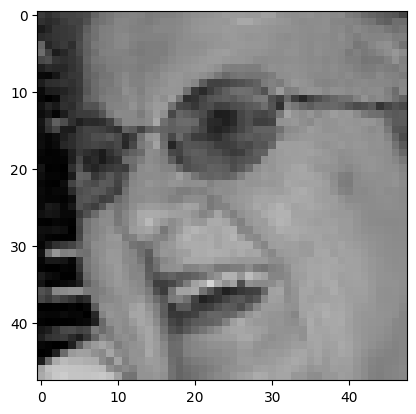

In [79]:
plt.imshow(img)

In [80]:
img=np.reshape(img,(1,48,48,3))

In [81]:
img

array([[[[ 58,  58,  58],
         [ 47,  47,  47],
         [ 57,  57,  57],
         ...,
         [ 89,  89,  89],
         [ 85,  85,  85],
         [ 68,  68,  68]],

        [[ 49,  49,  49],
         [ 42,  42,  42],
         [ 47,  47,  47],
         ...,
         [ 95,  95,  95],
         [110, 110, 110],
         [109, 109, 109]],

        [[ 27,  27,  27],
         [ 38,  38,  38],
         [ 54,  54,  54],
         ...,
         [119, 119, 119],
         [112, 112, 112],
         [118, 118, 118]],

        ...,

        [[ 28,  28,  28],
         [105, 105, 105],
         [170, 170, 170],
         ...,
         [130, 130, 130],
         [131, 131, 131],
         [135, 135, 135]],

        [[163, 163, 163],
         [191, 191, 191],
         [197, 197, 197],
         ...,
         [131, 131, 131],
         [133, 133, 133],
         [137, 137, 137]],

        [[170, 170, 170],
         [184, 184, 184],
         [199, 199, 199],
         ...,
         [131, 131, 131],
        

In [82]:
img=img/255.0

In [83]:
img

array([[[[0.22745098, 0.22745098, 0.22745098],
         [0.18431373, 0.18431373, 0.18431373],
         [0.22352941, 0.22352941, 0.22352941],
         ...,
         [0.34901961, 0.34901961, 0.34901961],
         [0.33333333, 0.33333333, 0.33333333],
         [0.26666667, 0.26666667, 0.26666667]],

        [[0.19215686, 0.19215686, 0.19215686],
         [0.16470588, 0.16470588, 0.16470588],
         [0.18431373, 0.18431373, 0.18431373],
         ...,
         [0.37254902, 0.37254902, 0.37254902],
         [0.43137255, 0.43137255, 0.43137255],
         [0.42745098, 0.42745098, 0.42745098]],

        [[0.10588235, 0.10588235, 0.10588235],
         [0.14901961, 0.14901961, 0.14901961],
         [0.21176471, 0.21176471, 0.21176471],
         ...,
         [0.46666667, 0.46666667, 0.46666667],
         [0.43921569, 0.43921569, 0.43921569],
         [0.4627451 , 0.4627451 , 0.4627451 ]],

        ...,

        [[0.10980392, 0.10980392, 0.10980392],
         [0.41176471, 0.41176471, 0.41176471]

In [84]:
model.predict(img)

1/1 [==============================] - 0s 275ms/step


array([[0.07843272, 0.01751558, 0.05540852, 0.72868204, 0.04800162,
        0.02198272, 0.04997682]], dtype=float32)

In [85]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 32ms/step


3

In [86]:
emotions=['angry','disgust','fear','happy','neutral','sad','surprise']